# Data Cleaning

In [51]:
import os

import pandas as pd

In [52]:
primary = pd.read_csv(
    "data/allcauseunplanned30-dayhospitalreadmissionratecalifornia2011_2023.csv"
)
primary.head()

,Year,Strata,Strata Name,County,Total Admits (ICD-9),30-day Readmits (ICD-9),30-day Readmission Rate (ICD-9),Total Admits (ICD-10),30-day Readmits (ICD-10),30-day Readmission Rate (ICD-10)
0,2011,Overall,Overall,State,1948641.0,272268.0,14%,NaN,NaN,NaN
1,2011,Age,18 to 44 years,State,326070.0,36855.0,11.30%,NaN,NaN,NaN
2,2011,Age,45 to 64 years,State,659801.0,90891.0,13.80%,NaN,NaN,NaN
3,2011,Age,65 years and above,State,962771.0,144522.0,15%,NaN,NaN,NaN
4,2011,Sex,Male,State,901776.0,132417.0,14.70%,NaN,NaN,NaN


In [53]:
primary = primary[(primary["Strata"] == "Overall") & (primary["County"] != "State")]
primary

,Year,Strata,Strata Name,County,Total Admits (ICD-9),30-day Readmits (ICD-9),30-day Readmission Rate (ICD-9),Total Admits (ICD-10),30-day Readmits (ICD-10),30-day Readmission Rate (ICD-10)
17,2011,Overall,Overall,Alameda,75103.0,11377.0,15.10%,NaN,NaN,NaN
18,2011,Overall,Overall,Alpine,13.0,1.0,7.70%,NaN,NaN,NaN
19,2011,Overall,Overall,Amador,2657.0,345.0,13%,NaN,NaN,NaN
20,2011,Overall,Overall,Butte,20422.0,3198.0,15.70%,NaN,NaN,NaN
21,2011,Overall,Overall,Calaveras,3253.0,392.0,12.10%,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
976,2023,Overall,Overall,Tulare,NaN,NaN,NaN,17918,2483,13.86%
977,2023,Overall,Overall,Tuolumne,NaN,NaN,NaN,3251,485,14.92%
978,2023,Overall,Overall,Ventura,NaN,NaN,NaN,35807,5244,14.65%
979,2023,Overall,Overall,Yolo,NaN,NaN,NaN,7760,1195,15.40%


In [54]:
columns_to_drop = [
    "Strata",
    "Strata Name",
    "Total Admits (ICD-10)",
    "30-day Readmits (ICD-10) ",
    "30-day Readmission Rate (ICD-10)",
]
primary_pre2016 = primary[primary["Year"] < 2016]
primary_pre2016 = primary_pre2016.drop(columns=columns_to_drop)
new_column_names = {
    "Total Admits (ICD-9)": "Total_Admits",
    "30-day Readmits (ICD-9) ": "30_day_Readmits",
    "30-day Readmission Rate (ICD-9)": "30_day_Readmission_Rate",
}
primary_pre2016 = primary_pre2016.rename(columns=new_column_names)

primary_pre2016

,Year,County,Total_Admits,30_day_Readmits,30_day_Readmission_Rate
17,2011,Alameda,75103.0,11377.0,15.10%
18,2011,Alpine,13.0,1.0,7.70%
19,2011,Amador,2657.0,345.0,13%
20,2011,Butte,20422.0,3198.0,15.70%
21,2011,Calaveras,3253.0,392.0,12.10%
...,...,...,...,...,...
370,2015,Tulare,16424.0,2243.0,13.66%
371,2015,Tuolumne,3144.0,410.0,13.04%
372,2015,Ventura,30175.0,3862.0,12.80%
373,2015,Yolo,5852.0,726.0,12.41%


In [55]:

columns_to_drop_2016 = [
    "Strata",
    "Strata Name",
    "Total Admits (ICD-9)",
    "30-day Readmits (ICD-9) ",
    "30-day Readmission Rate (ICD-9)",
]
primary_after2016 = primary[primary["Year"] >= 2016]
primary_after2016 = primary_after2016.drop(columns=columns_to_drop_2016)
new_column_names_2016 = {
    "Total Admits (ICD-10)": "Total_Admits",
    "30-day Readmits (ICD-10) ": "30_day_Readmits",
    "30-day Readmission Rate (ICD-10)": "30_day_Readmission_Rate",
}
primary_after2016 = primary_after2016.rename(columns=new_column_names_2016)
primary_after2016

,Year,County,Total_Admits,30_day_Readmits,30_day_Readmission_Rate
392,2016,Alameda,65203,9759,14.97%
393,2016,Alpine,21,1,4.76%
394,2016,Amador,2814,390,13.86%
395,2016,Butte,22675,4041,17.82%
396,2016,Calaveras,2868,400,13.95%
...,...,...,...,...,...
976,2023,Tulare,17918,2483,13.86%
977,2023,Tuolumne,3251,485,14.92%
978,2023,Ventura,35807,5244,14.65%
979,2023,Yolo,7760,1195,15.40%


In [56]:
cleaned_primary = pd.concat([primary_pre2016, primary_after2016], ignore_index=True)
cleaned_primary = cleaned_primary[cleaned_primary["Year"].isin([2016, 2020])]
cleaned_primary.drop(cleaned_primary[cleaned_primary['County'] == 'Unknown County'].index, inplace=True)
cleaned_primary

,Year,County,Total_Admits,30_day_Readmits,30_day_Readmission_Rate
290,2016,Alameda,65203,9759,14.97%
291,2016,Alpine,21,1,4.76%
292,2016,Amador,2814,390,13.86%
293,2016,Butte,22675,4041,17.82%
294,2016,Calaveras,2868,400,13.95%
...,...,...,...,...,...
576,2020,Tulare,18786,2653,14.12%
577,2020,Tuolumne,3304,474,14.35%
578,2020,Ventura,34820,4945,14.20%
579,2020,Yolo,6945,976,14.05%


In [85]:
cleaned_primary['30_day_Readmission_Rate'] = cleaned_primary['30_day_Readmission_Rate'].str.rstrip('%').astype(float)

In [86]:
cleaned_primary['Total_Admits'] = cleaned_primary['Total_Admits'].astype('int64')

In [87]:
cleaned_primary['30_day_Readmits'] = cleaned_primary['30_day_Readmits'].astype('int64')

In [88]:
cleaned_primary.to_csv("data/cleaned_data/primary.csv", index=False)

In [89]:
presidential = pd.read_csv('data/presidential.csv')
presidential

,Year,County,DEM,DEM(%),REO,REP(%),Win
0,2016,Alameda,514842,78.7,95922,14.7,Blue
1,2016,Alpine,334,55.5,217,36.0,Blue
2,2016,Amador,6004,33.9,10485,59.1,Red
3,2016,Butte,41567,43.5,45144,47.2,Red
4,2016,Calaveras,7944,34.3,13511,58.4,Red
...,...,...,...,...,...,...,...
113,2020,Tuolumne,11978,39.4,17689,58.2,Red
114,2020,Ventura,251388,59.5,162207,38.4,Blue
115,2020,Yolo,67598,69.5,27292,28.1,Blue
116,2020,Yuba,11230,37.7,17676,59.3,Red


In [90]:
# Correct errors in original data
presidential = presidential.rename(columns={"REO": "REP"})
presidential

,Year,County,DEM,DEM(%),REP,REP(%),Win
0,2016,Alameda,514842,78.7,95922,14.7,Blue
1,2016,Alpine,334,55.5,217,36.0,Blue
2,2016,Amador,6004,33.9,10485,59.1,Red
3,2016,Butte,41567,43.5,45144,47.2,Red
4,2016,Calaveras,7944,34.3,13511,58.4,Red
...,...,...,...,...,...,...,...
113,2020,Tuolumne,11978,39.4,17689,58.2,Red
114,2020,Ventura,251388,59.5,162207,38.4,Blue
115,2020,Yolo,67598,69.5,27292,28.1,Blue
116,2020,Yuba,11230,37.7,17676,59.3,Red


In [91]:
presidential.loc[63,'DEM(%)'] = 37.0
presidential.loc[63, 'Win'] = 'Red'
presidential.loc[63]

Year           2020
County    Calaveras
DEM           10046
DEM(%)         37.0
REP           16518
REP(%)         60.8
Win             Red
Name: 63, dtype: object

In [92]:
presidential.loc[70,'DEM(%)'] = 65.0
presidential.loc[70]

Year          2020
County    Humboldt
DEM          44768
DEM(%)        65.0
REP          21770
REP(%)        31.6
Win           Blue
Name: 70, dtype: object

In [93]:
presidential.loc[77,'DEM(%)'] = 71.0
presidential.loc[77]

Year             2020
County    Los Angeles
DEM           3028885
DEM(%)           71.0
REP           1145530
REP(%)           26.9
Win              Blue
Name: 77, dtype: object

In [94]:
presidential.loc[86,'DEM(%)'] = 69.0
presidential.loc[86]

Year       2020
County     Napa
DEM       49817
DEM(%)     69.0
REP       20676
REP(%)     28.7
Win        Blue
Name: 86, dtype: object

In [95]:
presidential.loc[91,'DEM(%)'] = 53.0
presidential.loc[91, 'REP(%)'] = 45.0
presidential.loc[91]

Year           2020
County    Riverside
DEM          528340
DEM(%)         53.0
REP          449144
REP(%)         45.0
Win            Blue
Name: 91, dtype: object

In [96]:
presidential.loc[97,'REP(%)'] = 42.0
presidential.loc[97, 'Win'] = 'Blue'
presidential.loc[97]

Year             2020
County    San Joaquin
DEM            161137
DEM(%)           55.9
REP            121098
REP(%)           42.0
Win              Blue
Name: 97, dtype: object

In [97]:
presidential.loc[107,'REP(%)'] = 23.0
presidential.loc[107, 'Win'] = 'Blue'
presidential.loc[107]

Year        2020
County    Sonoma
DEM       199938
DEM(%)      74.5
REP        61825
REP(%)      23.0
Win         Blue
Name: 107, dtype: object

In [98]:
presidential.loc[110,'DEM(%)'] = 31.0
presidential.loc[110, 'Win'] = 'Red'
presidential.loc[110]

Year        2020
County    Tehama
DEM         8911
DEM(%)      31.0
REP        19141
REP(%)      66.6
Win          Red
Name: 110, dtype: object

In [99]:
presidential.loc[112,'DEM(%)'] = 45.0
presidential.loc[112, 'Win'] = 'Red'
presidential.loc[112]

Year        2020
County    Tulare
DEM        66105
DEM(%)      45.0
REP        77579
REP(%)      52.8
Win          Red
Name: 112, dtype: object

In [125]:
# Dataset summary
presidential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    118 non-null    int64  
 1   County  118 non-null    object 
 2   DEM     118 non-null    int64  
 3   DEM(%)  118 non-null    float64
 4   REP     118 non-null    int64  
 5   REP(%)  118 non-null    float64
 6   Win     118 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 6.6+ KB


In [126]:
presidential.describe()

,Year,DEM,DEM(%),REP,REP(%)
count,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000
mean,2018.000000,3.366852e+05,52.042373,1.778022e+05,42.999153
std,2.008529,1.333256e+06,15.153321,6.961351e+05,14.985375
min,2016.000000,3.340000e+02,21.100000,2.170000e+02,9.300000
25%,2016.000000,8.342500e+03,39.875000,1.168175e+04,31.600000
50%,2018.000000,4.316750e+04,52.000000,2.685800e+04,43.500000
75%,2020.000000,1.556615e+05,63.800000,9.358750e+04,54.850000
max,2020.000000,1.111064e+07,85.300000,6.006518e+06,74.800000


In [70]:
presidential.to_csv("data/cleaned_data/presidentialResult.csv", index=False)

# EDA

In [71]:
import os
import altair as alt
import pandas as pd
from toolz.curried import pipe

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [102]:
cleaned_primary.describe()

,Year,Total_Admits,30_day_Readmits,30_day_Readmission_Rate
count,116.000000,116.000000,116.000000,116.000000
mean,2018.000000,29326.387931,4242.025862,13.520517
std,2.008677,63784.013367,9740.270928,2.323387
min,2016.000000,7.000000,1.000000,4.760000
25%,2016.000000,2612.250000,356.750000,12.315000
50%,2018.000000,8369.000000,1121.500000,13.770000
75%,2020.000000,28287.000000,4072.500000,14.532500
max,2020.000000,493868.000000,77874.000000,28.570000


In [103]:
cleaned_primary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 290 to 580
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     116 non-null    int64  
 1   County                   116 non-null    object 
 2   Total_Admits             116 non-null    int64  
 3   30_day_Readmits          116 non-null    int64  
 4   30_day_Readmission_Rate  116 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 9.5+ KB


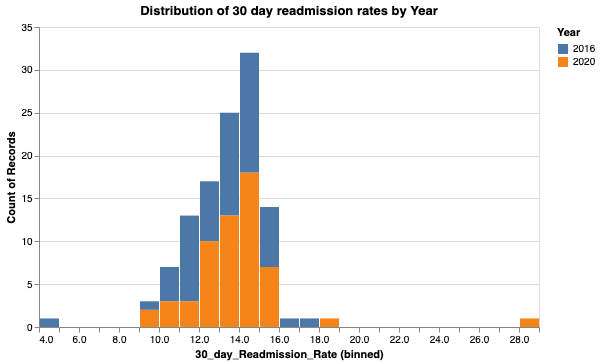

In [136]:
dist = alt.Chart(cleaned_primary).mark_bar().encode(
    alt.X("30_day_Readmission_Rate:Q").bin(maxbins=30),
    y="count()",
    color = alt.Color('Year:N'),
    tooltip=['count()']
).properties(
    title = "Distribution of 30 day readmission rates by Year",
    width = 500,
    height = 300
)
dist

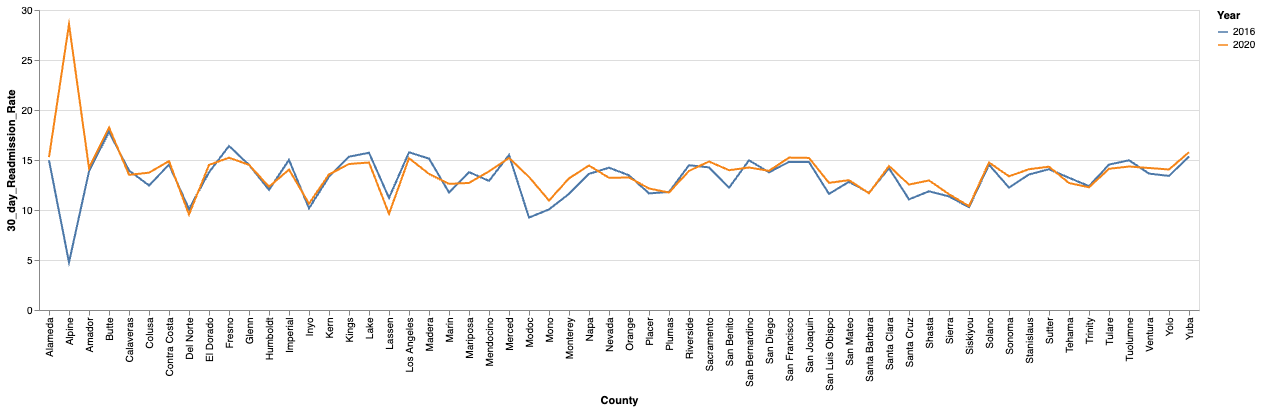

In [138]:
alt.Chart(cleaned_primary).mark_line().encode(
    alt.Y("30_day_Readmission_Rate:Q"),
    alt.X("County:N"),
    alt.Color('Year:N')
)

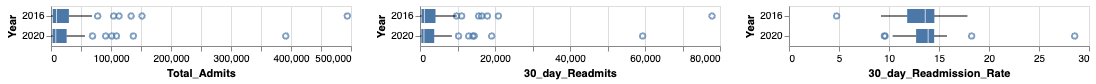

In [129]:
alt.Chart(cleaned_primary).mark_boxplot().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y("Year:N"),
).repeat(
    column=['Total_Admits', '30_day_Readmits','30_day_Readmission_Rate']
)

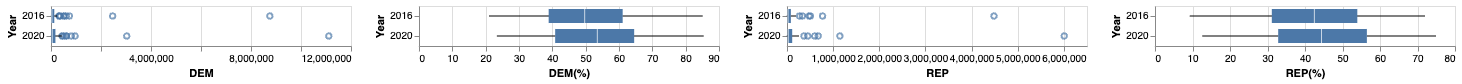

In [128]:
alt.Chart(presidential).mark_boxplot().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y("Year:N"),
).repeat(
    column=['DEM', 'DEM(%)','REP','REP(%)']
)

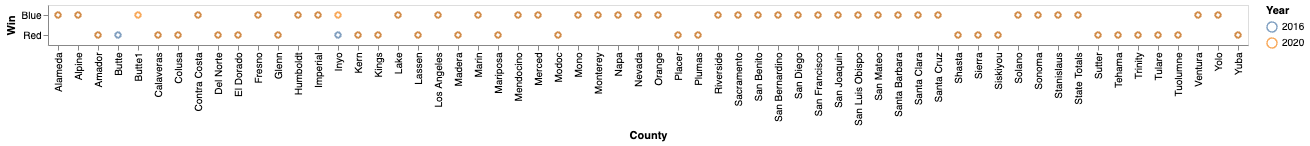

In [140]:
alt.Chart(presidential).mark_point().encode(
    alt.X("County"),
    alt.Y('Win'),
    color = alt.Color('Year:N')
)

# Generate SQL statements

In [37]:
primary_column=cleaned_primary.columns.to_list()
primary_column

['Year',
 'County',
 'Total_Admits',
 '30_day_Readmits',
 '30_day_Readmission_Rate']

In [38]:
presidential_column = presidential.columns.to_list()
presidential_column

['Year', 'County', 'DEM', 'DEM(%)', 'REP', 'REP(%)', 'Win']

In [42]:
import re
def clean_column_name(col):
    return re.sub(r'[^a-zA-Z0-9_]', '_', col).lower()

def generate_insert_statements(df, table_name):

    insert_statements = []
    df.columns = [clean_column_name(col) for col in df.columns]
    
    for _, row in df.iterrows():
        values = []
        for val in row:
            if pd.isna(val):
                values.append('NULL')
            elif isinstance(val, (int, float)):
                values.append(str(val))
            else:
                val_str = str(val).replace("'", "''")
                if any(x in str(val) for x in ['%', '_rate']):
                    val_str = val_str.rstrip('%')
                values.append(f"'{val_str}'")
        
        cols = ', '.join(df.columns)
        vals = ', '.join(values)
        insert_statements.append(f"INSERT INTO {table_name} ({cols}) VALUES ({vals});")
    
    return insert_statements

primary_inserts = generate_insert_statements(cleaned_primary, "readmissions")
presidential_inserts = generate_insert_statements(presidential, "elections")

all_inserts = primary_inserts + presidential_inserts

with open("insert_statements.sql", "w") as f:
    f.write("-- Healthcare Admissions Data\n")
    f.write("\n".join(primary_inserts))
    f.write("\n\n-- Election Results Data\n")
    f.write("\n".join(presidential_inserts))

print(f"Generated {len(primary_inserts)} healthcare INSERT statements")
print(f"Generated {len(presidential_inserts)} election INSERT statements")
print("All statements saved to insert_statements.sql")

Generated 116 healthcare INSERT statements
Generated 118 election INSERT statements
All statements saved to insert_statements.sql
